In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


2024-01-24 12:44:01.317409: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-24 12:44:01.318858: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-24 12:44:01.344688: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 12:44:01.344718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 12:44:01.345711: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation and preprocessing parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Provide the path to your dataset
dataset_path = '/home/harshit/Coding/Machine_learning/Chessman-image-dataset/Chess'

# Create a generator for training data
batch_size = 32
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),  # Adjust according to your autoencoder's input size
    batch_size=batch_size,
    class_mode='input',  # 'input' for autoencoder (output is the same as input)
    shuffle=True
)


Found 551 images belonging to 6 classes.


In [4]:
train_generator


In [5]:
images, labels = train_generator.next()
print(images.shape)  # Display the shape of the batch of images
print(labels.shape)  # Display the shape of the batch of labels


(32, 256, 256, 3)
(32, 256, 256, 3)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

autoencoder = Sequential()

# Add encoder layers
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

# Add decoder layers
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


2024-01-24 12:44:02.731963: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-01-24 12:44:02.731983: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: harshits-aspire
2024-01-24 12:44:02.731986: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: harshits-aspire
2024-01-24 12:44:02.732070: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.154.5
2024-01-24 12:44:02.732083: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.146.2
2024-01-24 12:44:02.732087: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:244] kernel version 535.146.2 does not match DSO version 535.154.5 -- cannot find working devices in this configuration


In [7]:
history =autoencoder.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator))


Epoch 1/10
18/18 [==============================] - 10s 495ms/step - loss: 0.0993
Epoch 2/10
18/18 [==============================] - 10s 551ms/step - loss: 0.0626
Epoch 3/10
18/18 [==============================] - 10s 529ms/step - loss: 0.0303
Epoch 4/10
18/18 [==============================] - 10s 563ms/step - loss: 0.0120
Epoch 5/10
18/18 [==============================] - 11s 591ms/step - loss: 0.0083
Epoch 6/10
18/18 [==============================] - 11s 596ms/step - loss: 0.0061
Epoch 7/10
18/18 [==============================] - 11s 592ms/step - loss: 0.0058
Epoch 8/10
18/18 [==============================] - 11s 594ms/step - loss: 0.0051
Epoch 9/10
18/18 [==============================] - 11s 584ms/step - loss: 0.0047
Epoch 10/10
18/18 [==============================] - 11s 576ms/step - loss: 0.0044


In [8]:
validation_generator = datagen.flow_from_directory(
    '/home/harshit/Coding/Machine_learning/Chessman-image-dataset/Chess',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='input',
    shuffle=False
)

autoencoder.evaluate(validation_generator, steps=len(validation_generator))


Found 551 images belonging to 6 classes.


18/18 [==============================] - 7s 375ms/step - loss: 0.0041


0.0041334135457873344

Epoch 1/10
18/18 [==============================] - 18s 1s/step - loss: 0.0042 - val_loss: 0.0042
Epoch 2/10
18/18 [==============================] - 17s 976ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 3/10
18/18 [==============================] - 17s 983ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 4/10
18/18 [==============================] - 18s 989ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 5/10
18/18 [==============================] - 17s 978ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 6/10
18/18 [==============================] - 18s 1s/step - loss: 0.0035 - val_loss: 0.0035
Epoch 7/10
18/18 [==============================] - 18s 992ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 8/10
18/18 [==============================] - 18s 987ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 9/10
18/18 [==============================] - 17s 980ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 10/10
18/18 [==============================] - 18s 989ms/step - loss: 0.0035 - val_loss: 0.

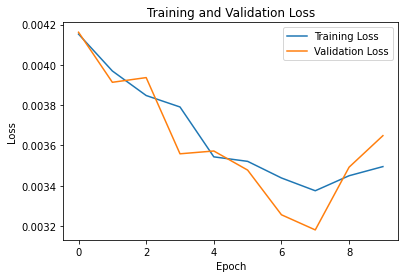

In [9]:
import matplotlib.pyplot as plt

# Train the autoencoder and store the training history
history = autoencoder.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator), validation_data=validation_generator, validation_steps=len(validation_generator))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


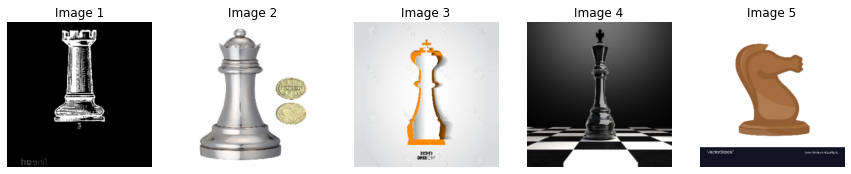

1/1 [==============================] - 0s 138ms/step


array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [10]:

import matplotlib.pyplot as plt


batch = train_generator.next()

# Extract the images from the batch
input_images = batch[0]

# Visualize the first five images
num_images_to_plot = 5
plt.figure(figsize=(15, 3))
for i in range(num_images_to_plot):
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.imshow(input_images[i])
    plt.title(f'Image {i + 1}')
    plt.axis('off')

plt.show()


encoder_layers = autoencoder.layers[:2]


encoder = Sequential(encoder_layers)

# Now, you can use 'encoder' to encode images
encoded_images = encoder.predict(input_images)

# Use 'autoencoder' for the entire autoencoder model
decoded_images = autoencoder.predict(input_images)
input_images

1/1 [==============================] - 0s 54ms/step


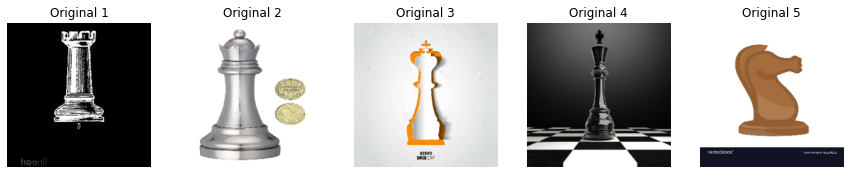

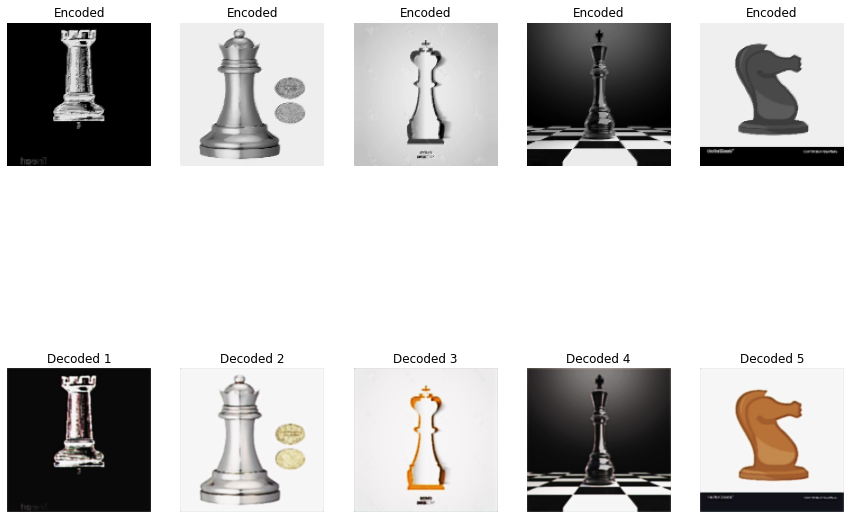

In [11]:
num_images_to_plot = 5
plt.figure(figsize=(15, 9))

# Plot original images
for i in range(num_images_to_plot):
    plt.subplot(3, num_images_to_plot, i + 1)
    plt.imshow(input_images[i])
    plt.title(f'Original {i + 1}')
    plt.axis('off')

encoded_images = encoder.predict(input_images)
encoded_images = np.squeeze(encoded_images)  # If the shape is (batch_size, 1, 1, num_features)
plt.figure(figsize=(15, 9))
for i in range(5):  # Display the encoded representations of the first 5 images
    plt.subplot(3, 5, i + 1)
    plt.imshow(encoded_images[i, :, :, 0], cmap='gray')  # Assuming the encoding is grayscale
    plt.title('Encoded')
    plt.axis('off')

# Plot decoded images
for i in range(num_images_to_plot):
    plt.subplot(3, num_images_to_plot, 2 * num_images_to_plot + i + 1)
    plt.imshow(decoded_images[i])
    plt.title(f'Decoded {i + 1}')
    plt.axis('off')

plt.show()




In [12]:
validation_loss = autoencoder.evaluate(validation_generator, steps=len(validation_generator))
print(f'Reconstruction Loss on Validation Set: {validation_loss}')


18/18 [==============================] - 7s 370ms/step - loss: 0.0036
Reconstruction Loss on Validation Set: 0.00362593587487936
